In [1]:
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
include("/home/jm2386/Active_Lattice/src/pm_pdes.jl");
include("/home/jm2386/Active_Lattice/src/pm_sims.jl");
include("/home/jm2386/Active_Lattice/src/pm_plot.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");

v3.0
v4.0


In [2]:
function cp_param(i)
    DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ = (1.0, 7.5, 1.0, 100, 0.05, 25.0, 0.5, 0.1,0.1,1e-5, 0.1);
    ϕa,ϕp = [(x,y) for x in 0.1:0.02:1.0, y in 0.0:0.01:0.4 if x+y<1][i]
    T, save_interval, param_name, pert = (1000.0, 10.0, "cp_experiment", "double")
    param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true, pert= pert)
    return param
end
function cp_param_coord(ϕa,ϕp)
    DT, v0, DR, N, Δx, Lx, Ly, _, _, δt, δ = (1.0, 7.5, 1.0, 100, 0.05, 25.0, 0.5, 0.1,0.1,1e-5, 0.1);
    T, save_interval, param_name, pert = (1000.0, 10.0, "cp_experiment", "double")
    param = new_param(DT, v0, DR, N, Δx, Lx, Ly, ϕa, ϕp, δt, δ; T = T, name = param_name, save_interval = save_interval, save_on = true, pert= pert)
    return param
end

cp_param_coord (generic function with 1 method)

In [8]:
nmax, cmax, dcmax = 0, 0, 0
function f_dots(param, fs)
    nmax, cmax, dcmax = 0, 0, 0
    for f in fs
        global nmax, cmax, dcmax
        normf, c, dc = f_dot(param, f)
        nmax, cmax, dcmax = min(normf,nmax), max(c,cmax), max(dc,dcmax)
    end
    return nmax, cmax, dcmax
end

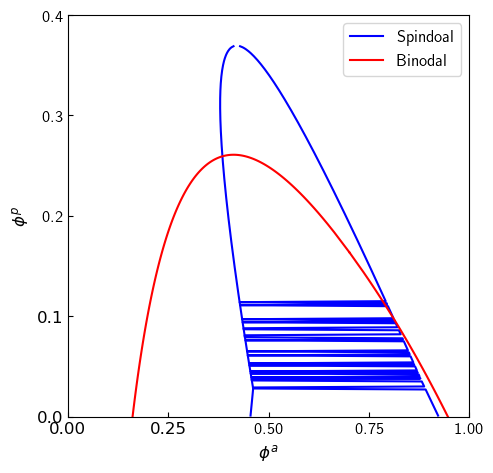

In [3]:
# plot cp
using PyPlot, LaTeXStrings
fig, ax = subplots(1,1,figsize=(5,5))
v0 = 7.5
plot_phase(fig, ax, v0, 12; Lxs = [], Δϕ = 0.001)
ϵ1 = 5e-2
ϵ2 = 5e-3
N = 1445
for i in 1:N
    try
        param = cp_param(i)
        ts,fs = silent_load_compress_pde(param)
        normf, c, _ = f_dots(param, fs[end:-1:(end-10)])
        @unpack ϕa, ϕp = param
        if (normf < ϵ1)
            ax.scatter(ϕa, ϕp; marker = "x", label = "homog", color = "green")
        elseif (c < ϵ2)&&(ts[end]>200)
            ax.scatter(ϕa, ϕp; marker = "^", label = "PS", color = "red")
        elseif (ts[end]>200)
            ax.scatter(ϕa, ϕp; marker = "o", label = "DS", color = "blue")
        end
    catch 
    end
end
display(fig)

In [4]:
# param = cp_param(134)
ϕa, ϕp = 0.5, 0.25
param = cp_param_coord(ϕa, ϕp);

In [5]:
ts,fs = silent_load_compress_pde(param)
print(ts[end])

990.0000082168865

In [6]:
frame = 90
# frame = length(ts)
normf, c, _ = f_dot(param, fs[frame])
print((normf, c, ts[frame]))

(0.13855466867387028, 0.019248799072147722, 890.0000084693622)

In [7]:
normf, c, _ = f_dots(param, fs[end:-1:(end-10)])

UndefVarError: UndefVarError: `f_dots` not defined

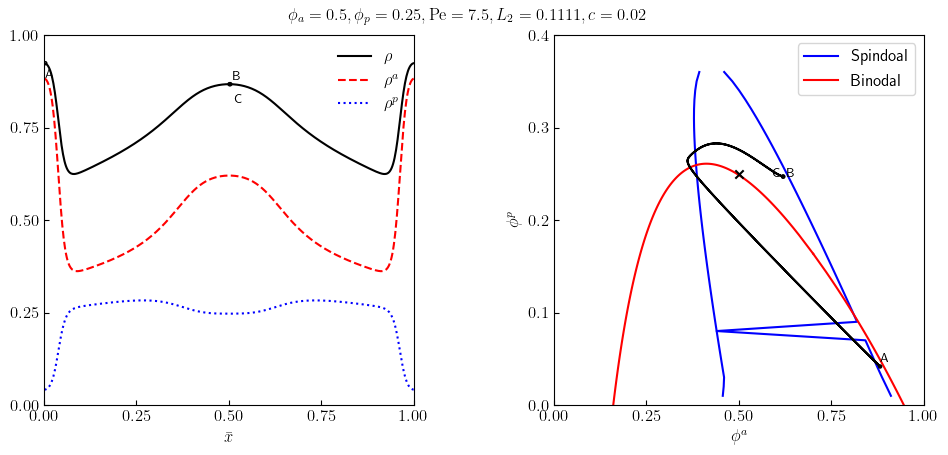

In [9]:
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,fs[frame]; c=c)

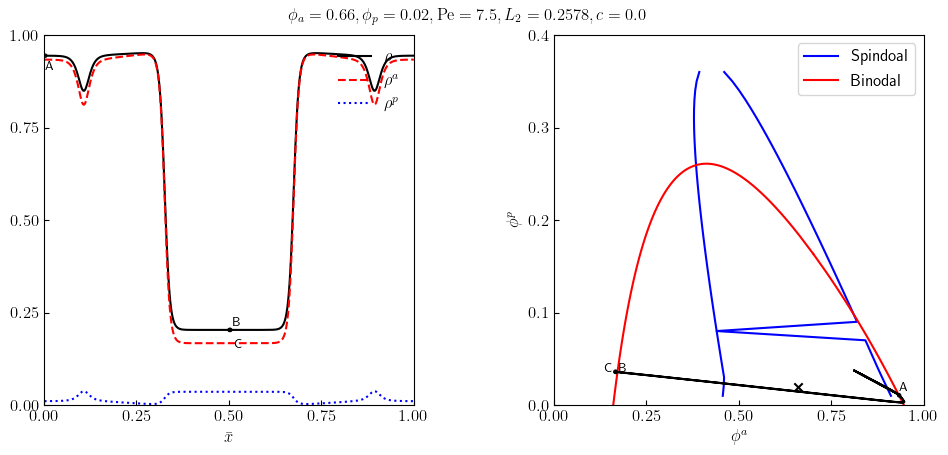

In [248]:
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,fs[frame]; c=c)

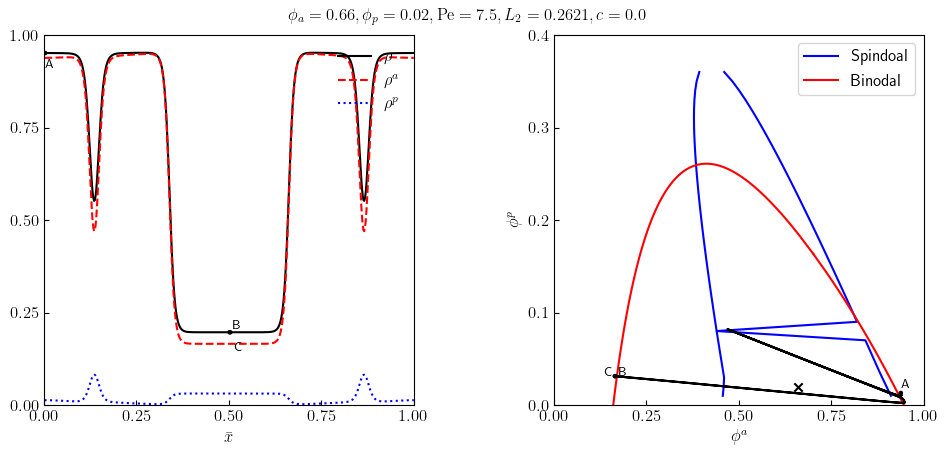

In [255]:
using PyPlot, LaTeXStrings
fig, axs = subplots(1,2,figsize=(10,5))
rc("text", usetex=true)
show_f(axs,fig,12,param,fs[frame]; c=c)